In [1]:
import numpy as np
from skimage import filters

fpath = "D:\AWA\phase_space_tomography_run2\Quadscan_data\\"

#load files into single dataset
vals = np.arange(-100,160,10)
vals[3] = -69
vals[-9] = 69
vals = np.delete(vals,[-2,-4,-6,-8,-10])

fnames = [f"{ele:+}.npy".replace("+", "p").replace("-", "n") for ele in
              vals]
fnames[10] = "0.npy"

all_data = []
n_images = 5
for name in fnames:
    all_data += [np.load(fpath + name)[:n_images]]

all_data = np.stack(all_data)

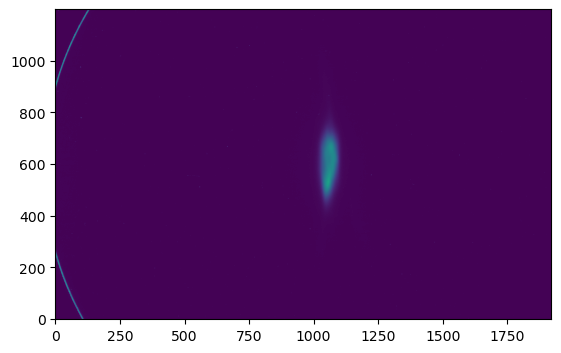

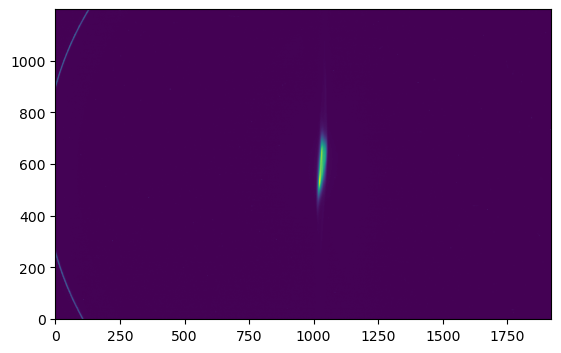

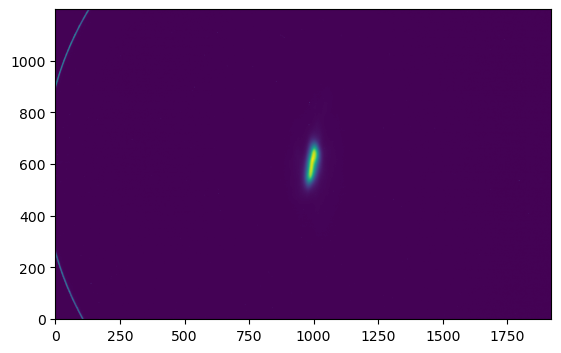

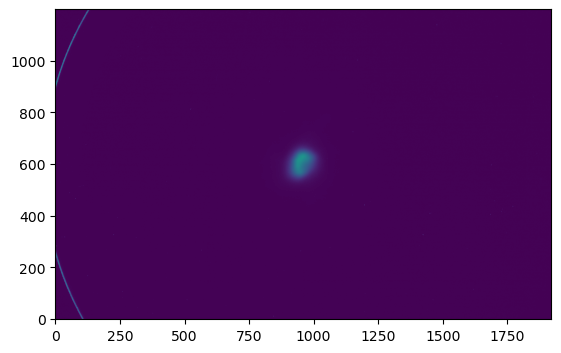

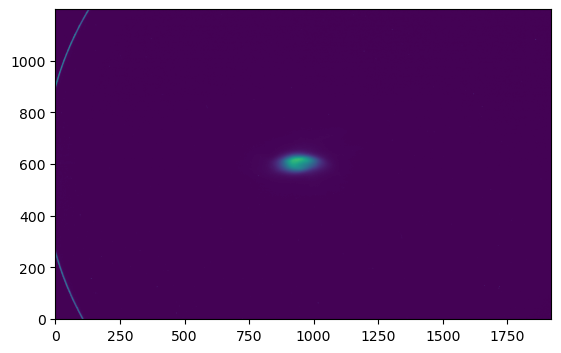

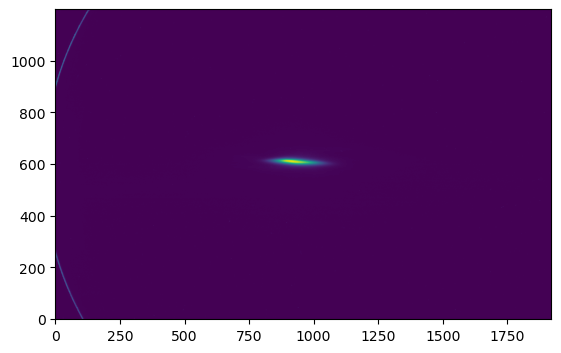

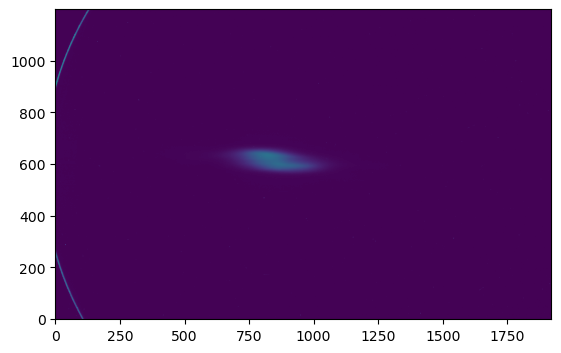

In [2]:
import matplotlib.pyplot as plt
for i in np.arange(0,21,3):
    plt.figure()
    plt.imshow(all_data[i,0], origin="lower")

In [3]:
total_im = np.sum(all_data, axis=0).sum(axis=0)
total_im = total_im - np.min(total_im)

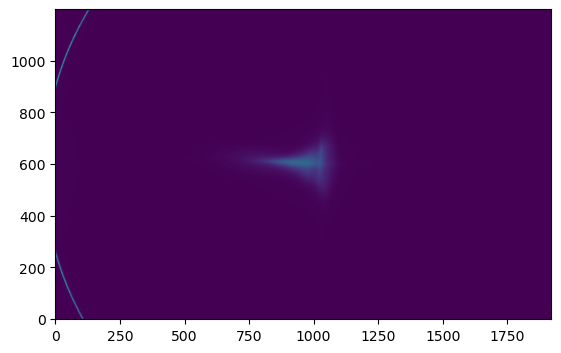

In [4]:
plt.imshow(total_im, origin="lower")

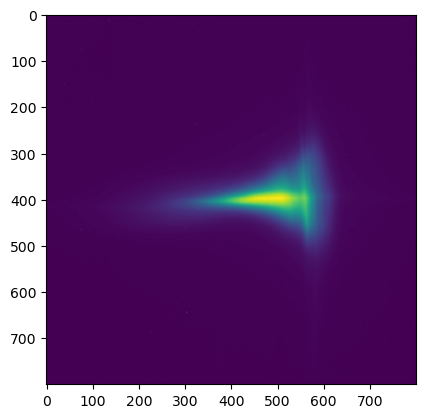

In [10]:
# cropping
# screen stats Circle(xy=(1144.55, 578.731), radius=1189.01)
# zero quad strength beam Circle(xy=(967.346, 606.512), radius=67.8045)
c = [606,866]
s = [400,400]
x_slice = slice(c[0] - s[0], c[0] + s[0])
y_slice = slice(c[1] - s[1], c[1] + s[1])
all_data_cropped = all_data[:,:,x_slice, y_slice]
total_im_cropped = np.sum(all_data_cropped, axis=0).sum(axis=0)
plt.imshow(total_im_cropped)

2018.0
(160, 160)
[ 4.23820635  3.81438571  3.39056508  2.92436238  2.54292381  2.11910317
  1.69528254  1.2714619   0.84764127  0.42382063 -0.         -0.42382063
 -0.84764127 -1.2714619  -1.69528254 -2.11910317 -2.92436238 -3.81438571
 -4.66202698 -5.50966825 -6.35730952]
[-4.25025582 -3.82523024 -3.40020466 -2.93267652 -2.55015349 -2.12512791
 -1.70010233 -1.27507675 -0.85005116 -0.42502558  0.          0.42502558
  0.85005116  1.27507675  1.70010233  2.12512791  2.93267652  3.82523024
  4.67528141  5.52533257  6.37538374]


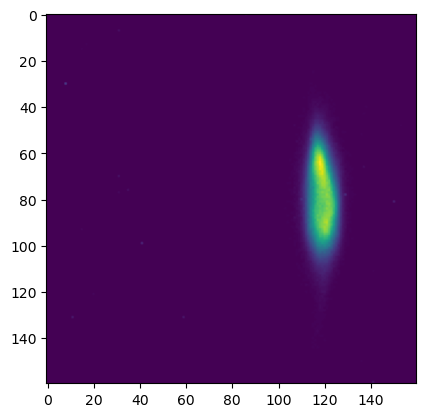

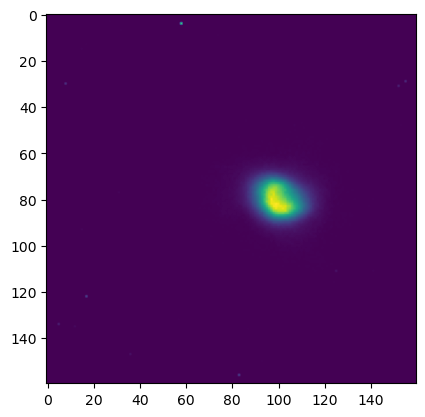

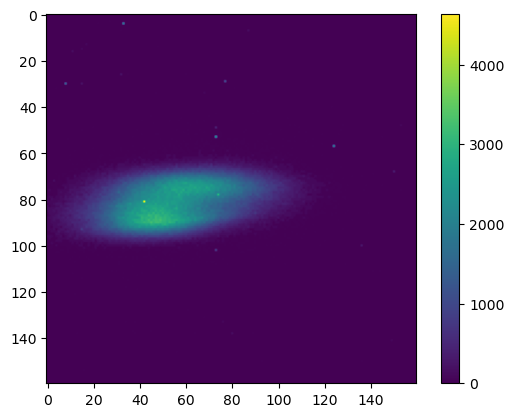

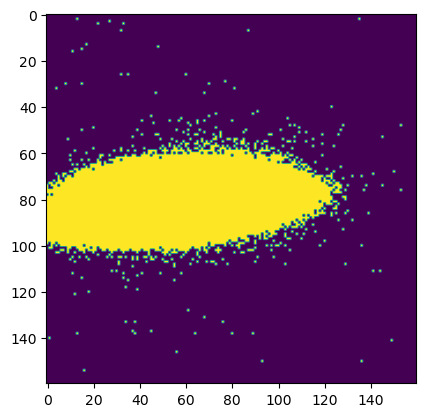

In [12]:
## downsample by a given factor
downsample_factor = 5
all_data_final = all_data_cropped[:,:,::downsample_factor, ::downsample_factor]

# apply a triangle threshold
threshold_multiplier = 1.0
thresh = filters.threshold_triangle(all_data_final[0, 0]) * threshold_multiplier
print(thresh)
all_data_final = np.clip(all_data_final - thresh, 0, None)

plt.figure()
plt.imshow(all_data_final[0,0])
plt.figure()
plt.imshow(all_data_final[10,0])
plt.figure()
plt.imshow(all_data_final[20,0])
plt.colorbar()

plt.figure()
plt.imshow(all_data_final[20,0] > 0)

print(all_data_final[20,0].shape)
# Count to T/m
count_tm = vals * 8.93e-3

# T/m to m^-2
beta1 = 1.0
Ebeam1 = 63e6
kvals = -count_tm * (1/((beta1 * Ebeam1*1e-9) / 0.299))
kvals_sq = count_tm / (33.35e-4 * Ebeam1/1e6)
print(kvals)
print(kvals_sq)


np.save("quad_strength.npy", kvals)
np.save("image_data.npy", all_data_final.transpose([0,1,-1,-2]))

In [13]:
all_data_final.transpose((0,1,-2,-1)).shape

(21, 5, 160, 160)